In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
df = pd.read_csv('academic Stress level - maintainance 1.csv')

In [42]:
df.shape

(140, 9)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            140 non-null    object
 1   Your Academic Stage                                                  140 non-null    object
 2   Peer pressure                                                        140 non-null    int64 
 3   Academic pressure from your home                                     140 non-null    int64 
 4   Study Environment                                                    139 non-null    object
 5   What coping strategy you use as a student?                           140 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  140 non-null    object
 7   What would you rat

In [44]:
#Checking the sample data
df.head(10)

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5
5,24/07/2025 22:08:13,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,4
6,24/07/2025 22:09:21,undergraduate,5,5,disrupted,Emotional breakdown (crying a lot),No,4,4
7,24/07/2025 22:10:06,undergraduate,3,2,Peaceful,"Social support (friends, family)",No,3,3
8,24/07/2025 22:11:01,undergraduate,2,2,Peaceful,Analyze the situation and handle it with intel...,No,2,2
9,24/07/2025 22:11:19,undergraduate,2,2,Peaceful,Analyze the situation and handle it with intel...,No,4,2


In [45]:
#Checking Null Values
df.isnull().sum()
df.dropna(inplace=True)


In [46]:
df.isnull().sum()

Timestamp                                                              0
Your Academic Stage                                                    0
Peer pressure                                                          0
Academic pressure from your home                                       0
Study Environment                                                      0
What coping strategy you use as a student?                             0
Do you have any bad habits like smoking, drinking on a daily basis?    0
What would you rate the academic  competition in your student life     0
Rate your academic stress index                                        0
dtype: int64

In [47]:
df.describe()

,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index
count,139.000000,139.000000,139.000000,139.000000
mean,3.057554,3.165468,3.482014,3.719424
std,1.075213,1.271751,1.024005,1.035800
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [48]:
df.columns

Index(['Timestamp', 'Your Academic Stage', 'Peer pressure',
       'Academic pressure from your home', 'Study Environment',
       'What coping strategy you use as a student?',
       'Do you have any bad habits like smoking, drinking on a daily basis?',
       'What would you rate the academic  competition in your student life',
       'Rate your academic stress index '],
      dtype='object')

In [49]:
df.rename(columns={
    'Your Academic Stage': 'Stage',
    'Peer pressure': 'PeerPressure',
    'Academic pressure from your home': 'HomePressure',
    'Study Environment': 'StudyEnv',
    'What coping strategy you use as a student?': 'CopingStrategy',
    'Do you have any bad habits like smoking, drinking on a daily basis?': 'BadHabits',
    'What would you rate the academic  competition in your student life': 'CompetitionRating',
    'Rate your academic stress index ': 'StressIndex'   # 👈 notice space
}, inplace=True)


In [50]:
df.columns

Index(['Timestamp', 'Stage', 'PeerPressure', 'HomePressure', 'StudyEnv',
       'CopingStrategy', 'BadHabits', 'CompetitionRating', 'StressIndex'],
      dtype='object')

### Exploratory Data Analysis

Stage

Text(0.5, 1.0, 'Average Stress Index by Academic Stage')

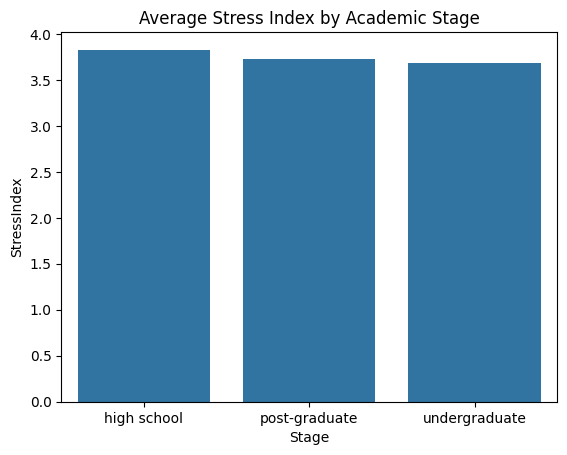

In [51]:
#Average Stress Index by Academic Stage
std_grad_status = df.groupby(['Stage'],as_index=False)["StressIndex"].mean().sort_values(by="StressIndex",ascending=False)

ax = sns.barplot(data=std_grad_status,x='Stage',y='StressIndex')
plt.title("Average Stress Index by Academic Stage")




Above graph shows the Average Stress Index by Academic Stage.

Text(0.5, 1.0, 'Impact of Peer Pressure on Stress Levels')

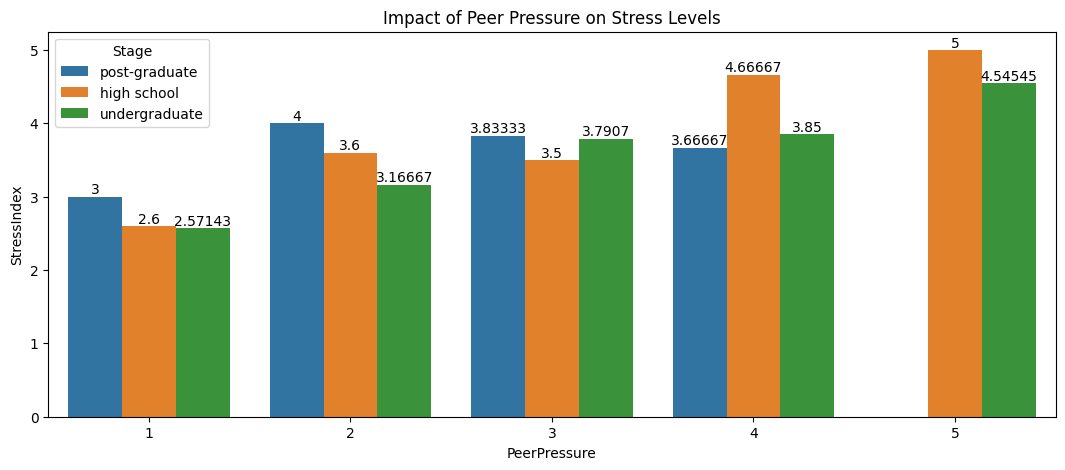

In [52]:
#Does peer pressure effect stress index
peer_index = df.groupby(["PeerPressure","Stage"],as_index=False)["StressIndex"].mean().sort_values(by="StressIndex",ascending=False)

plt.figure(figsize=(13,5))
ax = sns.barplot(data=peer_index,x="PeerPressure",y="StressIndex",hue="Stage")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Impact of Peer Pressure on Stress Levels")

In the above graph we clearly can see that the High peer pressure make stress high.

Text(0.5, 1.0, 'Impact of Home Pressure on Stress Levels')

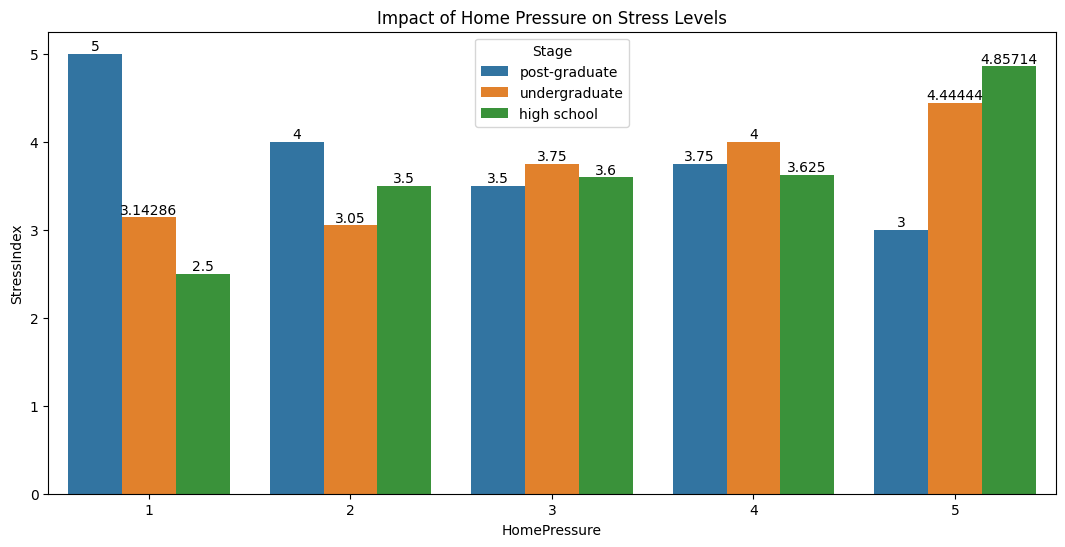

In [53]:
#How does Home pressure affect Stress Level
home_pr_str = df.groupby(["HomePressure","Stage"],as_index=False)["StressIndex"].mean().sort_values(by="StressIndex",ascending=False)

plt.figure(figsize=(13,6))
ax = sns.barplot(data=home_pr_str,x="HomePressure",y="StressIndex",hue="Stage")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Impact of Home Pressure on Stress Levels")

In the above graph we clearly can see that the High Home pressure also make stress high.

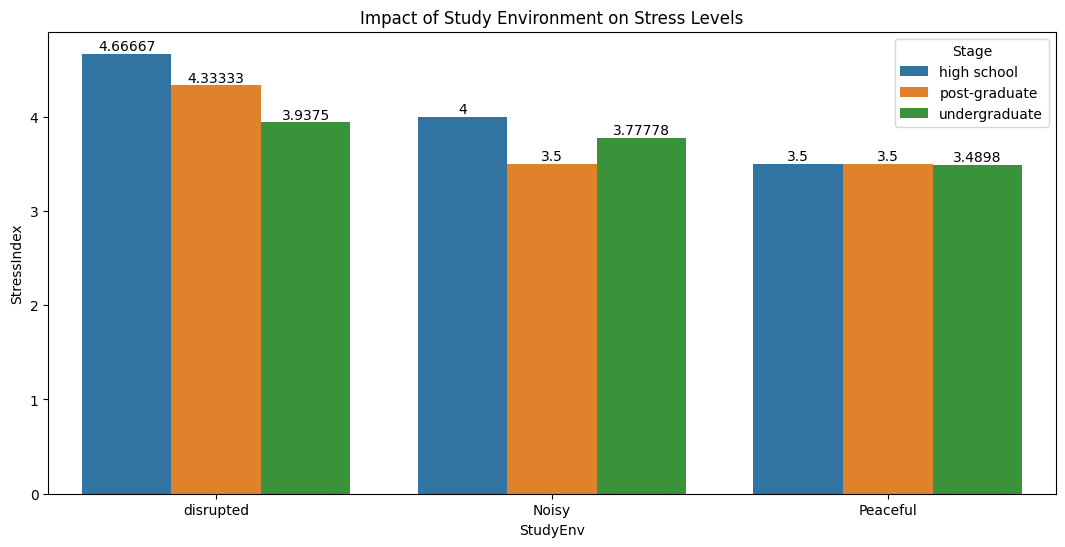

In [54]:
# Does study environment affect the stress levels
std_env_str = df.groupby(["StudyEnv","Stage"],as_index=False)["StressIndex"].mean().sort_values(by="StressIndex",ascending=False)

plt.figure(figsize=(13,6))
plt.title("Impact of Study Environment on Stress Levels")
ax = sns.barplot(data=std_env_str,x="StudyEnv",y="StressIndex",hue="Stage")
for bars in ax.containers:
    ax.bar_label(bars)


In the above graph we clearly can see that the Study Environment also affects the Stress Level.

CopingStrategy
Analyze the situation and handle it with intellect    87
Emotional breakdown (crying a lot)                    31
Social support (friends, family)                      21
Name: count, dtype: int64


Text(0, 0.5, 'Coping Strategy')

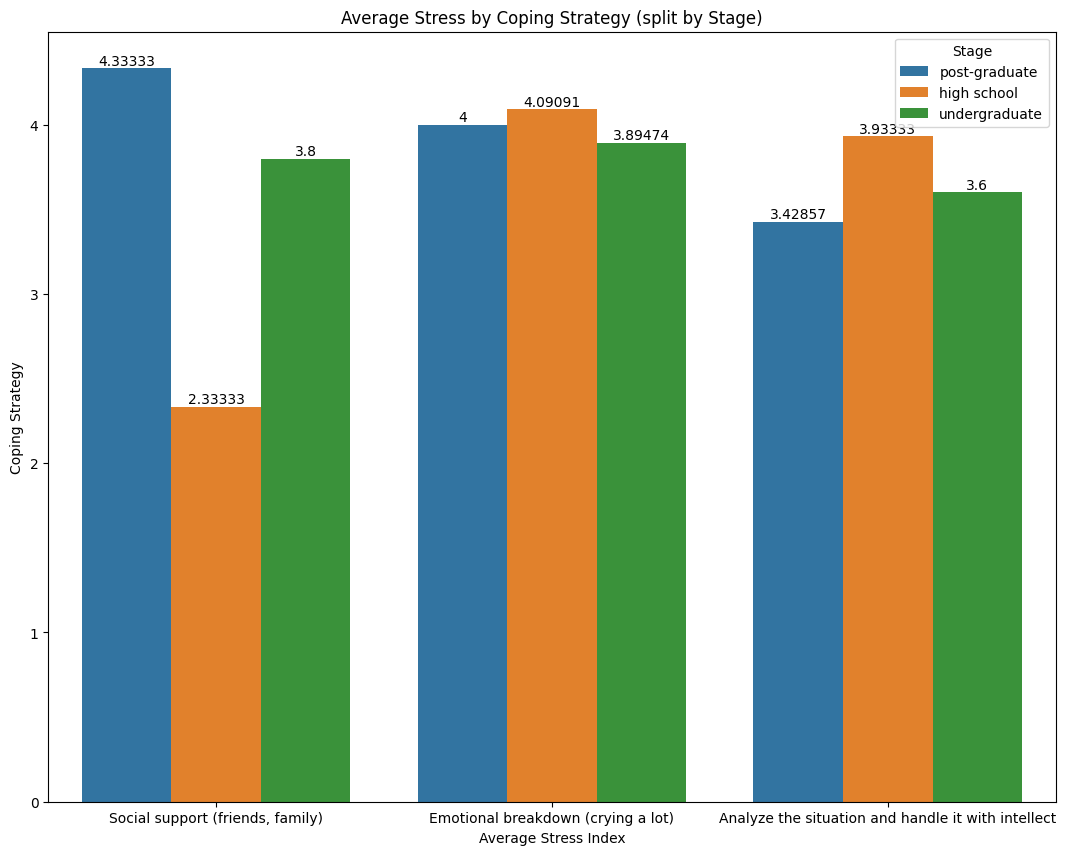

In [55]:
#Coping Strategy to tackle Stress
coping_counts = df["CopingStrategy"].value_counts()
print(coping_counts)

coping_strat = df.groupby(["CopingStrategy","Stage"],as_index=False)["StressIndex"].mean().sort_values(by="StressIndex",ascending=False)

plt.figure(figsize=(13,10))

plt.title("Average Stress by Coping Strategy")
ax=sns.barplot(data=coping_strat,
    x="CopingStrategy", y="StressIndex",
    hue="Stage", estimator=np.mean, dodge=True)
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Average Stress by Coping Strategy (split by Stage)")
plt.xlabel("Average Stress Index")
plt.ylabel("Coping Strategy")



Here we clearly can see the Post-graduate most used coping strategy is Social Support, Under-graduate most used coping strategy is Emotional Breakdown(Crying a lot) and High school most used coping strategy Analyze the situation and handle it will intellect.

BadHabits
No                   122
Yes                   10
prefer not to say      7
Name: count, dtype: int64


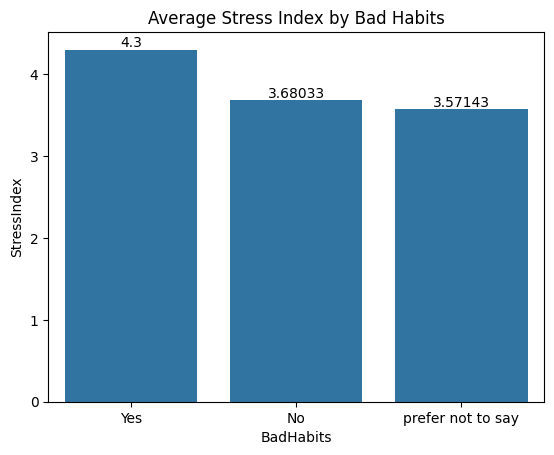

In [56]:
#Countng how many students reported bad habits
habit_counts = df["BadHabits"].value_counts()
print(habit_counts)

#Does Bad Habits affect stress Index
habit_str = df.groupby(["BadHabits"],as_index=False)["StressIndex"].mean().sort_values(by="StressIndex",ascending=False)

plt.title("Average Stress Index by Bad Habits")
ax=sns.barplot(data=habit_str,x="BadHabits",y="StressIndex")
for bars in ax.containers:
    ax.bar_label(bars)


Above graph shows that people who are involved in some bad activities have higher stress index compared to No Bad Habits people or the people who not preffered to say. 

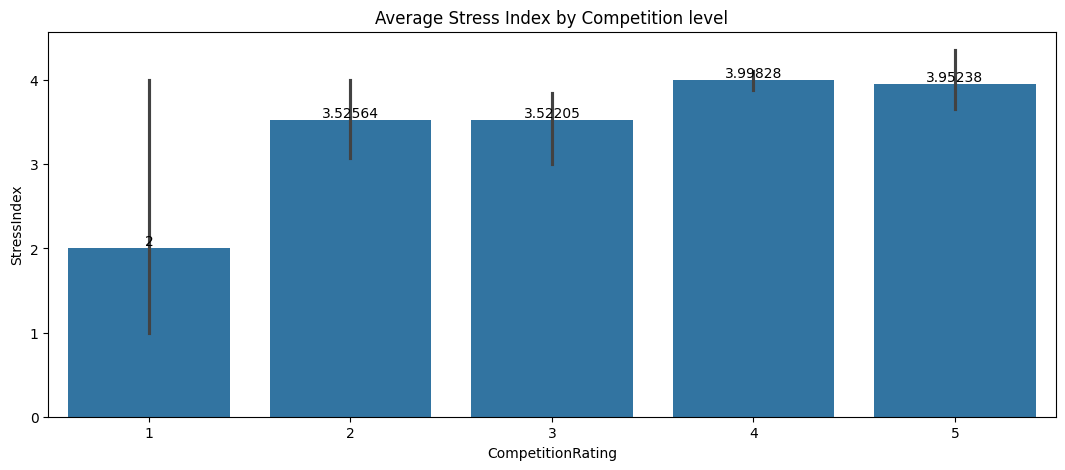

In [57]:
#Competiton affect on stress Index
Comp_str = df.groupby(["CompetitionRating",'Stage'],as_index=False)["StressIndex"].mean().sort_values(by="StressIndex",ascending=False)



plt.figure(figsize=(13,5))
plt.title("Average Stress Index by Competition level")
ax=sns.barplot(data=Comp_str,x="CompetitionRating",y="StressIndex")
for bars in ax.containers:
    ax.bar_label(bars)


Here we clearly can see that the high the competition is the high stress level.

# Conclusion

The analysis highlights the following key findings:
* **Competition and Stress:** The most significant finding is the direct relationship between a student's perceived level of academic competition and their stress index. The data clearly shows that as the competition rating increases, the average stress index also rises.
* **Dataset and Demographics:** The project used a dataset of 140 entries, with the majority of respondents being undergraduates.
* **Other Factors:** While competition was a key finding, the analysis also explored the impact of other factors, including peer pressure, home pressure, study environment, and coping strategies. The data shows the average academic pressure from home is 3.16 out of 5, and the average peer pressure is 3.05 out of 5. The average stress index across the dataset is 3.71 out of 5.
* **Coping Mechanisms:** The most common coping strategy among students was to "Analyze the situation and handle it with intelligence," while the least common was "Emotional breakdown".
* **Bad Habits:** The analysis also noted that most students surveyed did not have bad habits like smoking or drinking on a daily basis.

# Steps that may help to reduce stress

1.Coping Strategy:
The Coping strategy that helps the student most is "Analyze the situation and handle it " and "Social Support" is also very usefull, Students must look to these strategies rather than having emotional breakdown.

2.Bad Habits:
Although, the people having bad habits are less in numbers but they have the highest stress index which clearly indicates that bad habits increase stress levels.

3.Home Pressure:
Having "High home pressure" increases the stress level. So, we can make a campaign which make elder people aware of there Pressure can make a huge negative impact on a Student's Acedmic Life.

